# Regresaao Linear
Neste exercicio, vamos treinar um modelo de regressão linear para predição de valores contínuos.

# Importing all models we'll use

In [29]:
import pandas as pd #para a organizacao dos dados em dataframes.
import matplotlib.pyplot as plt #para a representacao grafica dos dados.
# import seaborn as sea -> tambem para a representacao grafica dos dados.
from sklearn.model_selection import train_test_split # para a separacao dos dados para treino e para teste.
from sklearn.linear_model import LinearRegression # importando o modelo para terina-lo.
from sklearn import metrics # importando as metricas ou funcoes para medir o desempenho do algoritmo ou modelo.
from math import sqrt # importando funcao matematica para calculos adicionais.

In [30]:
# Carregar o dataset para um dataframe(pandas)
df = pd.read_csv('../datasets/FuelConsumptionCo2.csv')
print(df.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

# Exibindo o resumo do dataset

In [31]:
print(df.describe())

       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

# Selecionar apenas as features do Motor e CO2

In [35]:
motores = df[["ENGINESIZE"]]
# motores = df.drop("CO2EMISSIONS")
co2 = df[["CO2EMISSIONS"]]
print(motores.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5


# Dividir o dataset em dados de treinamento e dados de teste neste casos usar o train_split do scikitlearn

In [19]:
motores_treino, motores_test, co2_traino, co2_test = train_test_split(motores, co2, test_size=.2, random_state=42)
print(type(motores_treino))

<class 'pandas.core.frame.DataFrame'>


# Exibir a correlacao entre as features do dataset de treinamento

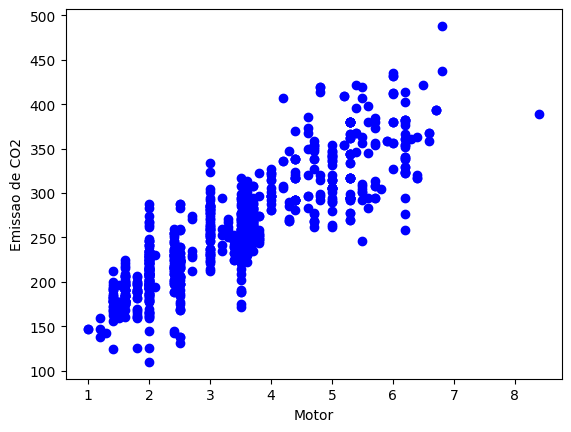

In [20]:
plt.scatter(motores_treino, co2_traino, color='blue')
plt.xlabel("Motor")
plt.ylabel("Emissao de CO2")
plt.show()

# Vamods trainar o modelo de regressao linear

In [21]:
# Criar um modelo de treino de regressao linear
modelo = LinearRegression()

# Treinar o modelo usando o dataset de treino
# Para encontrar o valor de A e B (Y = A + B.X)
modelo.fit(motores_treino, co2_traino)

LinearRegression()

# Exibir os coeficientes (A e B)

In [22]:
print("(A) Intercept: ", modelo.intercept_)
print("(B) Inclinacao: ", modelo.coef_)

(A) Intercept:  [126.28970217]
(B) Inclinacao:  [[38.99297872]]


# Vamos exibira nossa reta de regressao no dataset de treino

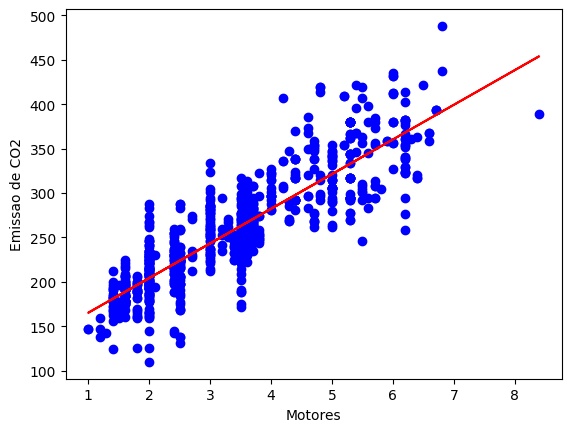

In [23]:
plt.scatter(motores_treino, co2_traino, color='blue')
plt.plot(motores_treino, modelo.coef_[0][0]*motores_treino + modelo.intercept_[0], '-r')
plt.ylabel("Emissao de CO2")
plt.xlabel("Motores")
plt.show()

# Vamos executar o nosso modelo no dataset de teste

In [25]:
#Primeiro a gente tem que fazer as predicoes usando o modelo e a base de teste
predicoesCo2 = modelo.predict(motores_test)

# Vamos exibir a nossa reta de regressao no dataset de teste

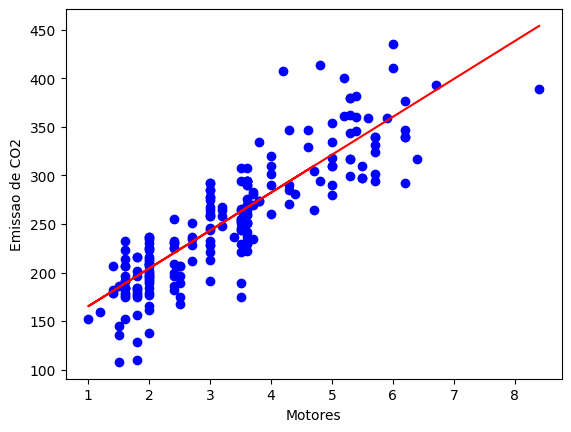

In [26]:
plt.scatter(motores_test, co2_test, color='blue')
plt.plot(motores_test, modelo.coef_[0][0]*motores_test + modelo.intercept_[0], '-r')
plt.ylabel("Emissao de CO2")
plt.xlabel("Motores")
plt.show()

# Vamos avaliar o modelo

In [27]:
import numpy as np
#Agora e mostrar as metricas
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoesCo2 - co2_test) ** 2))
print("Erro Quadratico Medio (MSE): %.2f " % metrics.mean_squared_error(co2_test, predicoesCo2))
print("Erro Medio Absoluto (MAE): %.2f "% metrics.mean_absolute_error(co2_test, predicoesCo2))
print("Raiz do Erro Quadratico Medio (RMSE): %.2f " % sqrt(metrics.mean_squared_error(co2_test, predicoesCo2)))
print("R2-score: %.2f " % metrics.r2_score(predicoesCo2, co2_test))

Soma dos Erros ao Quadrado (SSE): 210991 
Erro Quadratico Medio (MSE): 985.94 
Erro Medio Absoluto (MAE): 24.10 
Raiz do Erro Quadratico Medio (RMSE): 31.40 
R2-score: 0.68 


/var/folders/3f/3c_mbx_j3n7gmq7jf92vbbh00000gn/T/ipykernel_14872/1079999480.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoesCo2 - co2_test) ** 2))
